## Free fall Simulation
This simulation takes a sample of 100 heights ranging from 5 meters to 500 meters and applies the equation of free fall to obtain a time estimate.

It then plots a graph of time vs height for clarity.

*Note: This notebook is written with modularity in mind, so there will be a lot of functions.*

#### Constants:

In [2]:
GRAVITY: float = 9.81

### Function for calculating vertical position
#### Arguments: 

prev_pos -> Float | Previous position of an object at the most recent time  

v -> Float | Velocity of an object at a given time

t -> Float | Current time of that object 


#### Return value:

pos -> Float | Current height of the object

This function uses the formula:
$$position = position - velocity * time$$

In [3]:
def calc_pos(prev_pos: float, v: float, t: float):
    pos: float = prev_pos - (v * t)
    return pos

In [4]:
def calc_vel(t: float):
    v: float = GRAVITY * t
    return v

In [5]:
import numpy as np

def get_height_time_arr(time_increment: float = 0.5, max_height: float = 25.0):
    pos_arr = np.array([])
    time_arr = np.array([])

    height: float = max_height
    time: float = 0.0
    velocity: float = 0.0

    while height >= 0:
        velocity = calc_vel(time)
        height = calc_pos(height, velocity, time)
        pos_arr = np.append(pos_arr, height)
        time_arr = np.append(time_arr, time)
        time += time_increment
    
    return (pos_arr, time_arr)


In [6]:
import numpy as np

def get_time_from_height(time_increment: float = 0.5, max_height: float = 25.0) -> float:
    height: float = max_height
    time: float = 0.0
    velocity: float = 0.0

    while height >= 0:
        velocity = calc_vel(time)
        height = calc_pos(height, velocity, time)
        time += time_increment
    
    return time

In [7]:
import matplotlib.pyplot as plt

def plot_two_val(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

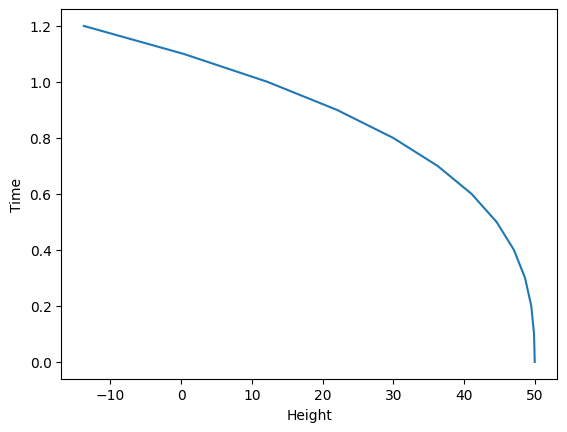

In [8]:
# For one iteration:
height_list, time_list = get_height_time_arr(0.1, 50)
plot_two_val(height_list, time_list, "Height", "Time")

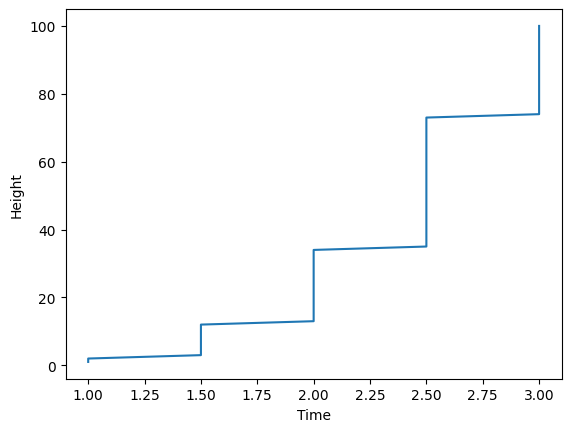

In [9]:
# For varying heights in a range of 5 to 500:
initial_height: float = 1

height_list = np.array([])
time_list = np.array([])

for i in range(1, 101):
    scaled_height:float = initial_height * i
    height_list = np.append(height_list, scaled_height)

    ground_time = get_time_from_height(0.5, scaled_height)
    time_list = np.append(time_list, ground_time)
 
plot_two_val(time_list, height_list, "Time", "Height")

### Object sliding down a banked slope

![Object sliding down inclined plane](./assets/images/img-inclined-plane-forces.png)

Also, note that:

From Newton's second law and taking a coordiante system with the x-axis parallel to the slope, we get:

$$mx''(t) = mg\cdot sin(\theta)$$

Then,

$$x(t) = \frac{1}{2}g\cdot sin(\theta)t^2$$

Also,

$$sin(\theta) = \frac{perpendicular (p)}{hypotenuse (h)} = \frac{p}{h}$$ 

Now, we're looking for time t = $T$ such that  $x(T) = h$,

$$h = \frac{1}{2}g\frac{p}{h}T^2$$

Finally, we derive an equation for calculating time $T$,

$$T=h\sqrt{\frac{2}{gp}}$$

In [94]:
import numpy as np

def rad_to_deg(value: float) -> float:
    return value * 180 / np.pi

def hor_weight_comp(m: float, g: float, angle: float) -> float:
    return m * g * np.cos(angle)

def ver_weight_comp(m: float, g: float, angle: float) -> float:
    return m * g * np.sin(angle)

def calc_hypotenuse(p: float, b: float) -> float:
    return pow(pow(p, 2) + pow(b, 2), 0.5)

def calc_angle(p: float, b: float) -> float:
    return rad_to_deg(np.arctan(p/b))

def calc_time(h: float, g: float, p: float) -> float:
    return h * np.sqrt(2/(g * p))

# Initial values (Using the pythagorean triplets: 3,4,5) of the inclined plane:
perpendicular: float = 4.0
base: float = 3.0
hypotenuse: float = 5.0
friction: float = 0.0

# Initial values of the object:
mass: float = 1.0 # In kg




In [109]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_inclined_plane(perpendicular: float = 4.0, h: float = 3.0, angle: float = 30.0, time: float = 1.0) -> None:
    h = calc_hypotenuse(perpendicular, base)
    # Creating the figure and the axes for the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim(-1, h + 1)
    ax.set_ylim(-1, h + 1)
    ax.axhline(0, color = "blue")

    # Drawing the time circle
    angles = np.linspace(0, np.pi / 2, 100) # Evenly space apart the points in the inscribed circle
    x_coor = h - h * np.cos(angles)
    y_coor = h * np.sin(angles)
    ax.plot(x_coor, y_coor, color = "red", linestyle = "dotted")

    # Creating the line for the inclined plane hypotenuse representation
    line = None
    theta: float = angle * np.pi / 180

    # Drawing the line
    x_line = h - h * np.cos(theta)
    y_line = h * np.sin(theta)

    # Drawing the line
    line = ax.plot([h, x_line], [0, y_line], 'k', lw = 2)[0]
    time_marker = ax.annotate(f'Time: {time}s', xy = (h, h), xytext = (h / 2 - 1, h + 1.25))

    # Creating the marker and the inclined plane
    ax.fill_between([h, h - h * np.cos(theta)], [0, h * np.sin(theta)], color = "gray", alpha = 0.25, hatch = "///")
    marker = ax.plot(x_line, y_line, marker = 'o', markersize=10, markeredgecolor = "black", markerfacecolor="blue")

    plt.show()


5 3 59.03624346792648 1.1774296025280135


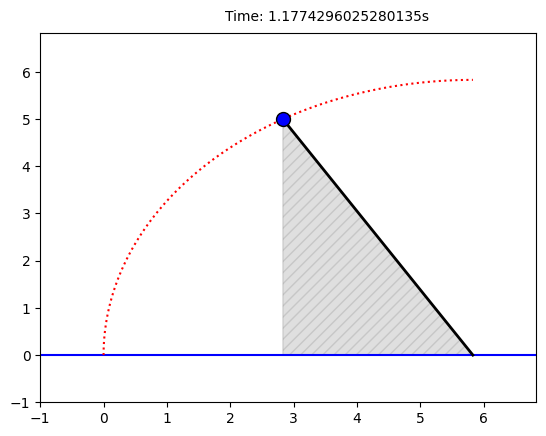

10 6 59.03624346792648 1.6651369126346796


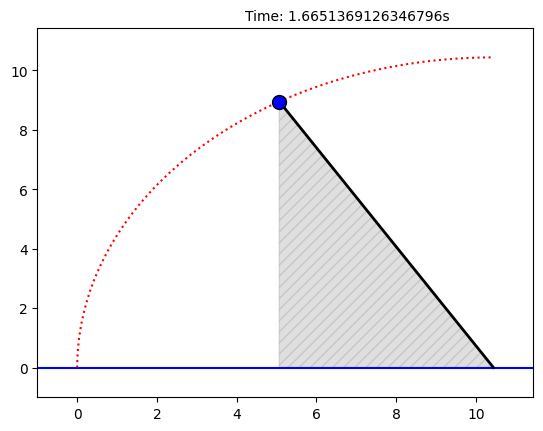

15 9 59.03624346792648 2.039367893914148


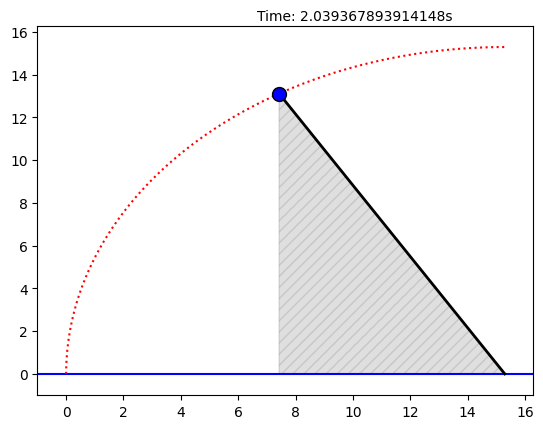

In [110]:
perpendicular_list = [5, 10, 15]
base_list = [3, 6, 9]

for i in range(len(perpendicular_list)):
    time: float = calc_time(calc_hypotenuse(perpendicular_list[i], base_list[i]), GRAVITY, perpendicular_list[i])
    angle: float = calc_angle(perpendicular_list[i], base_list[i]) 
    print(perpendicular_list[i], base_list[i], angle, time)
    create_inclined_plane(perpendicular_list[i], base_list[i], angle, time)

In [92]:
np.arctan(5/3)

1.0303768265243125